In [55]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

from sklearn import tree # for decision tree models
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs

#import matplotlib.pyplot as plt
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

Step 1: Import data from exported raw survey data

In [26]:
df = pd.read_csv("seatsurveymodel.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,8,25,26,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228,240,252,264,276,283,288,289,290) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Step 2: Observe and summarize data

In [27]:
# Column names overview
df.columns

Index(['participant.id_in_session', 'participant.code', 'participant.label',
       'participant._is_bot', 'participant._index_in_pages',
       'participant._max_page_index', 'participant._current_app_name',
       'participant._current_page_name', 'participant.time_started',
       'participant.visited',
       ...
       'survey.1.player.gender', 'survey.1.player.feet',
       'survey.1.player.inches', 'survey.1.player.rt',
       'survey.1.player.bizlei', 'survey.1.player.seattype',
       'survey.1.player.section', 'survey.1.player.comment',
       'survey.1.group.id_in_subsession', 'survey.1.subsession.round_number'],
      dtype='object', length=293)

Step 3: Trim width of dataframe

In [28]:
# Drop irrelevant columns
df.drop(['participant.label','participant._is_bot','participant._max_page_index',
        'participant._current_page_name','participant.visited',
        'participant.mturk_worker_id','participant.mturk_assignment_id','participant.payoff',
        'session.label','session.mturk_HITId','session.mturk_HITGroupId','session.comment', 'session.is_demo',  'session.config.real_world_currency_per_point', 'session.config.participation_fee', 'randseq.1.player.role', 'randseq.1.player.payoff', 'randseq.1.group.id_in_subsession', 'randseq.1.subsession.round_number', 'survey.1.player.id_in_group', 'survey.1.player.role', 'survey.1.player.payoff'], inplace = True, axis = 1
       )

In [29]:
# Verify removal of specified columns
df.columns

Index(['participant.id_in_session', 'participant.code',
       'participant._index_in_pages', 'participant._current_app_name',
       'participant.time_started', 'session.code',
       'randseq.1.player.id_in_group', 'randseq.1.player.page_sequence',
       'randseq.1.player.choice1', 'randseq.1.player.choice2',
       ...
       'survey.1.player.gender', 'survey.1.player.feet',
       'survey.1.player.inches', 'survey.1.player.rt',
       'survey.1.player.bizlei', 'survey.1.player.seattype',
       'survey.1.player.section', 'survey.1.player.comment',
       'survey.1.group.id_in_subsession', 'survey.1.subsession.round_number'],
      dtype='object', length=271)

Step 4: Re-label fields

In [30]:
#@title
# Rename/shorten column names
df.rename(columns=
{
"session.code": "session_code",    
"participant.id_in_session": "id_in_session",
"participant._index_in_pages": "index_in_pages",
"participant._current_app_name": "current_app_name",
"participant.time_started": "time_started",
"randseq.1.player.id_in_group": "id_in_group",
"randseq.1.player.page_sequence": "page_sequence",

"randseq.1.player.choice1": "choice1",
"randseq.1.player.distance_1": "distance_1",
"randseq.1.player.time_1": "time_1",
"randseq.1.player.price_1": "price_1",
"randseq.1.player.row_1a": "rowA_1",
"randseq.1.player.row_1b": "rowB_1",
"randseq.1.player.col_1a": "colA_1",
"randseq.1.player.col_1b": "colB_1",
"randseq.1.player.price_1a": "priceA_1",
"randseq.1.player.price_1b": "priceB_1",
"randseq.1.player.legroom_1a": "legroomA_1",
"randseq.1.player.legroom_1b": "legroomB_1",

"randseq.1.player.choice2": "choice2",
"randseq.1.player.distance_2": "distance_2",
"randseq.1.player.time_2": "time_2",
"randseq.1.player.price_2": "price_2",
"randseq.1.player.row_2a": "rowA_2",
"randseq.1.player.row_2b": "rowB_2",
"randseq.1.player.col_2a": "colA_2",
"randseq.1.player.col_2b": "colB_2",
"randseq.1.player.price_2a": "priceA_2",
"randseq.1.player.price_2b": "priceB_2",
"randseq.1.player.legroom_2a": "legroomA_2",
"randseq.1.player.legroom_2b": "legroomB_2",

"randseq.1.player.choice3": "choice3",
"randseq.1.player.distance_3": "distance_3",
"randseq.1.player.time_3": "time_3",
"randseq.1.player.price_3": "price_3",
"randseq.1.player.row_3a": "rowA_3",
"randseq.1.player.row_3b": "rowB_3",
"randseq.1.player.col_3a": "colA_3",
"randseq.1.player.col_3b": "colB_3",
"randseq.1.player.price_3a": "priceA_3",
"randseq.1.player.price_3b": "priceB_3",
"randseq.1.player.legroom_3a": "legroomA_3",
"randseq.1.player.legroom_3b": "legroomB_3",

"randseq.1.player.choice4": "choice4",
"randseq.1.player.distance_4": "distance_4",
"randseq.1.player.time_4": "time_4",
"randseq.1.player.price_4": "price_4",
"randseq.1.player.row_4a": "rowA_4",
"randseq.1.player.row_4b": "rowB_4",
"randseq.1.player.col_4a": "colA_4",
"randseq.1.player.col_4b": "colB_4",
"randseq.1.player.price_4a": "priceA_4",
"randseq.1.player.price_4b": "priceB_4",
"randseq.1.player.legroom_4a": "legroomA_4",
"randseq.1.player.legroom_4b": "legroomB_4",

"randseq.1.player.choice_5": "choice5",
"randseq.1.player.distance_5": "distance_5",
"randseq.1.player.time_5": "time_5",
"randseq.1.player.price_5": "price_5",
"randseq.1.player.row_5a": "rowA_5",
"randseq.1.player.row_5b": "rowB_5",
"randseq.1.player.col_5a": "colA_5",
"randseq.1.player.col_5b": "colB_5",
"randseq.1.player.price_5a": "priceA_5",
"randseq.1.player.price_5b": "priceB_5",
"randseq.1.player.legroom_5a": "legroomA_5",
"randseq.1.player.legroom_5b": "legroomB_5",

"randseq.1.player.choice_6": "choice6",
"randseq.1.player.distance_6": "distance_6",
"randseq.1.player.time_6": "time_6",
"randseq.1.player.price_6": "price_6",
"randseq.1.player.row_6a": "rowA_6",
"randseq.1.player.row_6b": "rowB_6",
"randseq.1.player.col_6a": "colA_6",
"randseq.1.player.col_6b": "colB_6",
"randseq.1.player.price_6a": "priceA_6",
"randseq.1.player.price_6b": "priceB_6",
"randseq.1.player.legroom_6a": "legroomA_6",
"randseq.1.player.legroom_6b": "legroomB_6",

"randseq.1.player.choice_7": "choice7",
"randseq.1.player.distance_7": "distance_7",
"randseq.1.player.time_7": "time_7",
"randseq.1.player.price_7": "price_7",
"randseq.1.player.row_7a": "rowA_7",
"randseq.1.player.row_7b": "rowB_7",
"randseq.1.player.col_7a": "colA_7",
"randseq.1.player.col_7b": "colB_7",
"randseq.1.player.price_7a": "priceA_7",
"randseq.1.player.price_7b": "priceB_7",
"randseq.1.player.legroom_7a": "legroomA_7",
"randseq.1.player.legroom_7b": "legroomB_7",

"randseq.1.player.choice_8": "choice8",
"randseq.1.player.distance_8": "distance_8",
"randseq.1.player.time_8": "time_8",
"randseq.1.player.price_8": "price_8",
"randseq.1.player.row_8a": "rowA_8",
"randseq.1.player.row_8b": "rowB_8",
"randseq.1.player.col_8a": "colA_8",
"randseq.1.player.col_8b": "colB_8",
"randseq.1.player.price_8a": "priceA_8",
"randseq.1.player.price_8b": "priceB_8",
"randseq.1.player.legroom_8a": "legroomA_8",
"randseq.1.player.legroom_8b": "legroomB_8",

"randseq.1.player.choice_9": "choice9",
"randseq.1.player.distance_9": "distance_9",
"randseq.1.player.time_9": "time_9",
"randseq.1.player.price_9": "price_9",
"randseq.1.player.row_9a": "rowA_9",
"randseq.1.player.row_9b": "rowB_9",
"randseq.1.player.col_9a": "colA_9",
"randseq.1.player.col_9b": "colB_9",
"randseq.1.player.price_9a": "priceA_9",
"randseq.1.player.price_9b": "priceB_9",
"randseq.1.player.legroom_9a": "legroomA_9",
"randseq.1.player.legroom_9b": "legroomB_9",

"randseq.1.player.choice_10": "choice10",
"randseq.1.player.distance_10": "distance_10",
"randseq.1.player.time_10": "time_10",
"randseq.1.player.price_10": "price_10",
"randseq.1.player.row_10a": "rowA_10",
"randseq.1.player.row_10b": "rowB_10",
"randseq.1.player.col_10a": "colA_10",
"randseq.1.player.col_10b": "colB_10",
"randseq.1.player.price_10a": "priceA_10",
"randseq.1.player.price_10b": "priceB_10",
"randseq.1.player.legroom_10a": "legroomA_10",
"randseq.1.player.legroom_10b": "legroomB_10",

"randseq.1.player.choice_11": "choice11",
"randseq.1.player.distance_11": "distance_11",
"randseq.1.player.time_11": "time_11",
"randseq.1.player.price_11": "price_11",
"randseq.1.player.row_11a": "rowA_11",
"randseq.1.player.row_11b": "rowB_11",
"randseq.1.player.col_11a": "colA_11",
"randseq.1.player.col_11b": "colB_11",
"randseq.1.player.price_11a": "priceA_11",
"randseq.1.player.price_11b": "priceB_11",
"randseq.1.player.legroom_11a": "legroomA_11",
"randseq.1.player.legroom_11b": "legroomB_11",

"randseq.1.player.choice_12": "choice12",
"randseq.1.player.distance_12": "distance_12",
"randseq.1.player.time_12": "time_12",
"randseq.1.player.price_12": "price_12",
"randseq.1.player.row_12a": "rowA_12",
"randseq.1.player.row_12b": "rowB_12",
"randseq.1.player.col_12a": "colA_12",
"randseq.1.player.col_12b": "colB_12",
"randseq.1.player.price_12a": "priceA_12",
"randseq.1.player.price_12b": "priceB_12",
"randseq.1.player.legroom_12a": "legroomA_12",
"randseq.1.player.legroom_12b": "legroomB_12",

"randseq.1.player.choice_13": "choice13",
"randseq.1.player.distance_13": "distance_13",
"randseq.1.player.time_13": "time_13",
"randseq.1.player.price_13": "price_13",
"randseq.1.player.row_13a": "rowA_13",
"randseq.1.player.row_13b": "rowB_13",
"randseq.1.player.col_13a": "colA_13",
"randseq.1.player.col_13b": "colB_13",
"randseq.1.player.price_13a": "priceA_13",
"randseq.1.player.price_13b": "priceB_13",
"randseq.1.player.legroom_13a": "legroomA_13",
"randseq.1.player.legroom_13b": "legroomB_13",

"randseq.1.player.choice_14": "choice14",
"randseq.1.player.distance_14": "distance_14",
"randseq.1.player.time_14": "time_14",
"randseq.1.player.price_14": "price_14",
"randseq.1.player.row_14a": "rowA_14",
"randseq.1.player.row_14b": "rowB_14",
"randseq.1.player.col_14a": "colA_14",
"randseq.1.player.col_14b": "colB_14",
"randseq.1.player.price_14a": "priceA_14",
"randseq.1.player.price_14b": "priceB_14",
"randseq.1.player.legroom_14a": "legroomA_14",
"randseq.1.player.legroom_14b": "legroomB_14",

"randseq.1.player.choice_15": "choice15",
"randseq.1.player.distance_15": "distance_15",
"randseq.1.player.time_15": "time_15",
"randseq.1.player.price_15": "price_15",
"randseq.1.player.row_15a": "rowA_15",
"randseq.1.player.row_15b": "rowB_15",
"randseq.1.player.col_15a": "colA_15",
"randseq.1.player.col_15b": "colB_15",
"randseq.1.player.price_15a": "priceA_15",
"randseq.1.player.price_15b": "priceB_15",
"randseq.1.player.legroom_15a": "legroomA_15",
"randseq.1.player.legroom_15b": "legroomB_15",

"randseq.1.player.choice_16": "choice16",
"randseq.1.player.distance_16": "distance_16",
"randseq.1.player.time_16": "time_16",
"randseq.1.player.price_16": "price_16",
"randseq.1.player.row_16a": "rowA_16",
"randseq.1.player.row_16b": "rowB_16",
"randseq.1.player.col_16a": "colA_16",
"randseq.1.player.col_16b": "colB_16",
"randseq.1.player.price_16a": "priceA_16",
"randseq.1.player.price_16b": "priceB_16",
"randseq.1.player.legroom_16a": "legroomA_16",
"randseq.1.player.legroom_16b": "legroomB_16",

"randseq.1.player.choice_17": "choice17",
"randseq.1.player.distance_17": "distance_17",
"randseq.1.player.time_17": "time_17",
"randseq.1.player.price_17": "price_17",
"randseq.1.player.row_17a": "rowA_17",
"randseq.1.player.row_17b": "rowB_17",
"randseq.1.player.col_17a": "colA_17",
"randseq.1.player.col_17b": "colB_17",
"randseq.1.player.price_17a": "priceA_17",
"randseq.1.player.price_17b": "priceB_17",
"randseq.1.player.legroom_17a": "legroomA_17",
"randseq.1.player.legroom_17b": "legroomB_17",

"randseq.1.player.choice_18": "choice18",
"randseq.1.player.distance_18": "distance_18",
"randseq.1.player.time_18": "time_18",
"randseq.1.player.price_18": "price_18",
"randseq.1.player.row_18a": "rowA_18",
"randseq.1.player.row_18b": "rowB_18",
"randseq.1.player.col_18a": "colA_18",
"randseq.1.player.col_18b": "colB_18",
"randseq.1.player.price_18a": "priceA_18",
"randseq.1.player.price_18b": "priceB_18",
"randseq.1.player.legroom_18a": "legroomA_18",
"randseq.1.player.legroom_18b": "legroomB_18",

"randseq.1.player.choice_19": "choice19",
"randseq.1.player.distance_19": "distance_19",
"randseq.1.player.time_19": "time_19",
"randseq.1.player.price_19": "price_19",
"randseq.1.player.row_19a": "rowA_19",
"randseq.1.player.row_19b": "rowB_19",
"randseq.1.player.col_19a": "colA_19",
"randseq.1.player.col_19b": "colB_19",
"randseq.1.player.price_19a": "priceA_19",
"randseq.1.player.price_19b": "priceB_19",
"randseq.1.player.legroom_19a": "legroomA_19",
"randseq.1.player.legroom_19b": "legroomB_19",

"randseq.1.player.choice_20": "choice20",
"randseq.1.player.distance_20": "distance_20",
"randseq.1.player.time_20": "time_20",
"randseq.1.player.price_20": "price_20",
"randseq.1.player.row_20a": "rowA_20",
"randseq.1.player.row_20b": "rowB_20",
"randseq.1.player.col_20a": "colA_20",
"randseq.1.player.col_20b": "colB_20",
"randseq.1.player.price_20a": "priceA_20",
"randseq.1.player.price_20b": "priceB_20",
"randseq.1.player.legroom_20a": "legroomA_20",
"randseq.1.player.legroom_20b": "legroomB_20",

"randseq.1.player.choice_21": "choice21",
"randseq.1.player.distance_21": "distance_21",
"randseq.1.player.time_21": "time_21",
"randseq.1.player.price_21": "price_21",
"randseq.1.player.row_21a": "rowA_21",
"randseq.1.player.row_21b": "rowB_21",
"randseq.1.player.col_21a": "colA_21",
"randseq.1.player.col_21b": "colB_21",
"randseq.1.player.price_21a": "priceA_21",
"randseq.1.player.price_21b": "priceB_21",
"randseq.1.player.legroom_21a": "legroomA_21",
"randseq.1.player.legroom_21b": "legroomB_21",

"survey.1.player.age": "age",
"survey.1.player.gender": "gender",
"survey.1.player.feet": "height_feet",
"survey.1.player.inches": "height_inches",
"survey.1.player.rt": "annual_trip_freq",
"survey.1.player.bizlei": "percentage_biz",
"survey.1.player.seattype": "seat_type_preference",
"survey.1.player.section": "section_preference",
"survey.1.player.comment": "comment"

}, inplace=True)

Step 5: Remove incomplete survey responses

In [31]:
# Filter to keep only completed survey rows
filtered_df = df.query('current_app_name == "survey" and session_code == "s6qkz77s"')
filtered_df.info()
filtered_df.describe()
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 24 to 328
Columns: 271 entries, id_in_session to survey.1.subsession.round_number
dtypes: float64(26), int64(152), object(93)
memory usage: 291.1+ KB


,id_in_session,participant.code,index_in_pages,current_app_name,time_started,session_code,id_in_group,page_sequence,choice1,choice2,distance_1,time_1,price_1,rowA_1,rowB_1,colA_1,colB_1,priceA_1,priceB_1,legroomA_1,legroomB_1,distance_2,time_2,price_2,rowA_2,rowB_2,colA_2,colB_2,priceA_2,priceB_2,legroomA_2,legroomB_2,distance_3,time_3,price_3,rowA_3,rowB_3,colA_3,colB_3,priceA_3,...,priceA_19,priceB_19,legroomA_19,legroomB_19,choice19,distance_20,time_20,price_20,rowA_20,rowB_20,colA_20,colB_20,priceA_20,priceB_20,legroomA_20,legroomB_20,choice20,distance_21,time_21,price_21,rowA_21,rowB_21,colA_21,colB_21,priceA_21,priceB_21,legroomA_21,legroomB_21,choice21,age,gender,height_feet,height_inches,annual_trip_freq,percentage_biz,seat_type_preference,section_preference,comment,survey.1.group.id_in_subsession,survey.1.subsession.round_number
24,1,ixi1jkao,23,survey,2021-04-15 23:36:35.096369+00:00,s6qkz77s,1,"[""Q21"", ""Q15"", ""Q4"", ""Q2"", ""Q19"", ""Q12"", ""Q10""...",Seat A,Seat B,3.4,Red-eye,194,13,27,E,E,6,0,0,1,4.9,Daytime,253,10,10,E,F,1,4,0,0,1.8,Red-eye,69,13,13,A,C,4,...,21,24,2,3,Seat A,2.8,Daytime,241,11,16,A,F,9,6,1,0,Seat B,1.9,Daytime,98,10,23,A,B,0,0,1,1,Seat A,32.0,Male,5.0,10.0,6.0,25.0,Window,Economy,NaN,1,1
28,5,p1n8e9va,23,survey,2021-04-16 01:35:43.132533+00:00,s6qkz77s,5,"[""Q7"", ""Q14"", ""Q9"", ""Q3"", ""Q18"", ""Q15"", ""Q21"",...",Seat A,Seat B,1.6,Daytime,66,13,27,E,E,14,0,1,1,3.9,Red-eye,171,10,10,E,F,1,5,1,1,4.7,Red-eye,218,13,13,A,C,0,...,25,29,2,3,Seat A,2.0,Daytime,119,11,16,A,F,2,0,1,0,Seat B,5.3,Daytime,455,10,23,A,B,8,6,0,0,Seat A,28.0,Male,5.0,8.0,5.0,40.0,Aisle,First,NaN,1,1
29,6,8j3yb395,23,survey,2021-04-16 01:36:06.063812+00:00,s6qkz77s,6,"[""Q3"", ""Q12"", ""Q1"", ""Q21"", ""Q17"", ""Q18"", ""Q11""...",Seat A,Seat B,0.8,Daytime,46,13,27,E,E,1,0,0,1,4.9,Daytime,189,10,10,E,F,4,6,0,0,2.4,Daytime,168,13,13,A,C,1,...,35,41,2,3,Seat A,0.8,Daytime,50,11,16,A,F,5,1,1,1,Seat B,1.6,Daytime,112,10,23,A,B,0,0,1,1,Seat A,33.0,Female,5.0,8.0,6.0,50.0,Window,Economy,NaN,1,1
38,15,pr29qnzv,23,survey,2021-04-16 02:40:31.624725+00:00,s6qkz77s,15,"[""Q14"", ""Q17"", ""Q3"", ""Q4"", ""Q9"", ""Q16"", ""Q8"", ...",Seat B,Seat B,2.1,Daytime,97,13,27,E,E,19,3,0,1,1.2,Red-eye,56,10,10,E,F,2,3,1,1,2.3,Red-eye,113,13,13,A,C,4,...,33,42,2,3,Seat A,4.8,Red-eye,324,11,16,A,F,10,6,1,1,Seat B,4.9,Red-eye,369,10,23,A,B,3,0,1,1,Seat A,20.0,Male,5.0,9.0,1.0,0.0,Window,Economy,How do you handle bias from people who have ne...,1,1
39,16,l0hz8k3t,23,survey,2021-04-16 02:55:05.067225+00:00,s6qkz77s,16,"[""Q15"", ""Q3"", ""Q14"", ""Q1"", ""Q20"", ""Q5"", ""Q9"", ...",Seat A,Seat B,2.4,Red-eye,105,13,27,E,E,10,0,0,1,5.4,Red-eye,293,10,10,E,F,2,5,0,0,3.7,Red-eye,240,13,13,A,C,1,...,27,33,2,3,Seat A,1.4,Daytime,102,11,16,A,F,1,0,1,1,Seat B,5.1,Daytime,398,10,23,A,B,2,0,1,1,Seat A,53.0,Female,5.0,11.0,12.0,9.0,Middle,Premier,NaN,1,1


Now that the data is trimmed into a manageable size, we will transform/clean it to be used for modeling.
Each row in our current dataframe corresponds to a participant with over 100 columns of fields that span 21 questions. With the intent of using Logit Regression analysis for modeling the binary probability of choosing seat A or seat B (21 pairs), we decided to break each participant row into 21 rows with each row corresponding to a unique participant-question combination.
To do this, we utilized the Pandas wide_to_long function to transform the dataframe (see code below):

In [32]:
#Create 21 rows for each person
df_clean = pd.wide_to_long(filtered_df, ['choice','price_','distance_','time_','legroomA_','legroomB_','priceA_','priceB_',
                                         'colA_','colB_','rowA_','rowB_'], i = 'participant.code', 
                                           j = 'question').sort_values(['participant.code','question'])
print(df_clean)

                          section_preference  height_feet  ...  rowA_  rowB_
participant.code question                                  ...              
0ae9sh8m         1                   Economy          5.0  ...     13     27
                 2                   Economy          5.0  ...     10     10
                 3                   Economy          5.0  ...     13     13
                 4                   Economy          5.0  ...     14      8
                 5                   Economy          5.0  ...      5     21
...                                      ...          ...  ...    ...    ...
yp2s1c53         17                  Economy          6.0  ...     26      9
                 18                  Economy          6.0  ...     13     17
                 19                  Economy          6.0  ...      8      6
                 20                  Economy          6.0  ...     11     16
                 21                  Economy          6.0  ...     10     23

Furthermore, to eliminate skewness/bias in our analysis, we decided to scale the continuous variables (i.e. legroom, price, height, age, distance).

[To confirm with Alaska]
There is uncertainty regarding whether to scale the incremental price versus scale the total price as it is a possibility that the survey respondent did not factor the base price into their decision-making. Another consideration is to classify age as a categorical variable instead of a continuous variable pending the age distribution of the survey respondents.

In [33]:
# Scaled Variables
#Legroom
df_clean["scaled_legroomA"] = preprocessing.scale(pd.to_numeric(df_clean["legroomA_"]))
df_clean["scaled_legroomB"] = preprocessing.scale(pd.to_numeric(df_clean["legroomB_"]))

#Total Price
df_clean["scaled_totalPriceA"] = preprocessing.scale((pd.to_numeric(df_clean["price_"]) + pd.to_numeric(df_clean["priceA_"])))
df_clean["scaled_totalPriceB"] = preprocessing.scale((pd.to_numeric(df_clean["price_"]) + pd.to_numeric(df_clean["priceB_"])))

#Variable Price
df_clean["scaled_varPriceA"] = preprocessing.scale(pd.to_numeric(df_clean["priceA_"]))
df_clean["scaled_varPriceB"] = preprocessing.scale(pd.to_numeric(df_clean["priceB_"]))

#Combined Height
df_clean["scaled_height"] = preprocessing.scale((df_clean["height_feet"]*12.0 + df_clean["height_inches"]))

#Age
df_clean["scaled_age"] = preprocessing.scale(df_clean["age"])

#Distance
df_clean["scaled_distance"] = preprocessing.scale(df_clean["distance_"])

Currently each row of data corresponds to a participant-question combination which consists of two seat attributes (Seat A and Seat B). Although we are interested in this pair-wise comparison as structured from the survey, de-coupling this would be helpful in modeling for the coefficients associated with variables such as rows, legroom, price, etc. Thus, the following code will double the rows where 42 rows (21 questions * 2 seats/question) correspond to each participant.

In [34]:
# Double the rows
df_clean2 = pd.DataFrame(np.repeat(df_clean.values,2,axis=0))
df_clean2.columns = df_clean.columns

In [35]:
df_clean2.reset_index()
df_clean2['seat_indicator'] = np.where((df_clean2.index%2) == 0, 'Seat A','Seat B')

In [36]:
#Seat String
df_clean2['seat'] = np.where(df_clean2['seat_indicator'] == 'Seat A',
                             df_clean2['rowA_'].astype(str) + df_clean2['colA_'],
                             df_clean2['rowB_'].astype(str) + df_clean2['colB_'])

In [37]:
#Binary Selection Variable
df_clean2['selection'] = np.where(df_clean2['choice']==df_clean2['seat_indicator'],'1','0')

In [38]:
#Create Selected and Alternative Columns
df_clean2['legroom'] = np.where(df_clean2['selection'] == '1', 
                        np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_legroomA'], df_clean2['scaled_legroomB']), 
                         np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_legroomA'], df_clean2['scaled_legroomB']))
df_clean2['legroom_alt'] = np.where(df_clean2['selection'] == '1', 
                            np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_legroomB'], df_clean2['scaled_legroomA']), 
                             np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_legroomB'], df_clean2['scaled_legroomA']))

df_clean2['price_total'] = np.where(df_clean2['selection'] == '1', 
                        np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_totalPriceA'], df_clean2['scaled_totalPriceB']), 
                         np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_totalPriceA'], df_clean2['scaled_totalPriceB']))
df_clean2['price_total_alt'] = np.where(df_clean2['selection'] == '1', 
                            np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_totalPriceB'], df_clean2['scaled_totalPriceA']), 
                             np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_totalPriceB'], df_clean2['scaled_totalPriceA']))

df_clean2['price_increase'] = np.where(df_clean2['selection'] == '1', 
                        np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_varPriceA'], df_clean2['scaled_varPriceB']), 
                         np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_varPriceA'], df_clean2['scaled_varPriceB']))
df_clean2['price_increase_alt'] = np.where(df_clean2['selection'] == '1', 
                            np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_varPriceB'], df_clean2['scaled_varPriceA']), 
                             np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['scaled_varPriceB'], df_clean2['scaled_varPriceA']))

df_clean2['row'] = np.where(df_clean2['selection'] == '1', 
                        np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['rowA_'], df_clean2['rowB_']), 
                         np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['rowA_'], df_clean2['rowB_']))
df_clean2['row_alt'] = np.where(df_clean2['selection'] == '1', 
                            np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['rowB_'], df_clean2['rowA_']), 
                             np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['rowB_'], df_clean2['rowA_']))

df_clean2['column'] = np.where(df_clean2['selection'] == '1', 
                        np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['colA_'], df_clean2['colB_']), 
                         np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['colA_'], df_clean2['colB_']))
df_clean2['column_alt'] = np.where(df_clean2['selection'] == '1', 
                            np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['colB_'], df_clean2['colA_']), 
                             np.where(df_clean2['choice']==df_clean2['seat_indicator'], df_clean2['colB_'], df_clean2['colA_']))

In [39]:
#Drop Unnecessary Columns
df_clean2.drop(['legroomA_','legroomB_','scaled_legroomA','scaled_legroomB','priceA_','priceB_','scaled_varPriceA',
                'scaled_varPriceB','time_started','comment','survey.1.subsession.round_number',
               'survey.1.group.id_in_subsession','current_app_name','id_in_session','id_in_group','session_code',
               'index_in_pages','seat_indicator','colA_','colB_','rowA_','rowB_','scaled_totalPriceA','scaled_totalPriceB','age',
                'distance_','height_feet','height_inches','choice','price_'], inplace = True, axis = 1)

In [40]:
#Order Columns
df_clean = df_clean2[['selection','seat','row','row_alt','column','column_alt','legroom','legroom_alt',
                     'price_total','price_total_alt','price_increase','price_increase_alt','scaled_distance',
                      'time_','scaled_age','scaled_height','gender',
                      'percentage_biz','annual_trip_freq','seat_type_preference',
                      'section_preference','page_sequence']]

In [41]:
df_clean.to_csv('seatsurvey_clean2.csv', header=True)

In [42]:
df_clean.info()
df_clean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5754 entries, 0 to 5753
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   selection             5754 non-null   object
 1   seat                  5754 non-null   object
 2   row                   5754 non-null   object
 3   row_alt               5754 non-null   object
 4   column                5754 non-null   object
 5   column_alt            5754 non-null   object
 6   legroom               5754 non-null   object
 7   legroom_alt           5754 non-null   object
 8   price_total           5754 non-null   object
 9   price_total_alt       5754 non-null   object
 10  price_increase        5754 non-null   object
 11  price_increase_alt    5754 non-null   object
 12  scaled_distance       5754 non-null   object
 13  time_                 5754 non-null   object
 14  scaled_age            5754 non-null   object
 15  scaled_height         5754 non-null   

,selection,seat,row,row_alt,column,column_alt,legroom,legroom_alt,price_total,price_total_alt,price_increase,price_increase_alt,scaled_distance,time_,scaled_age,scaled_height,gender,percentage_biz,annual_trip_freq,seat_type_preference,section_preference,page_sequence
count,5754,5754,5754,5754,5754,5754,5754.000000,5754.000000,5754.000000,5754.000000,5754.000000,5754.000000,5754.000000,5754,5754.000000,5754.000000,5754,5754.0,5754.0,5754,5754,5754
unique,2,39,21,21,6,6,12.000000,12.000000,883.000000,883.000000,269.000000,269.000000,48.000000,2,45.000000,19.000000,3,20.0,18.0,3,3,137
top,0,9C,13,13,F,F,-0.210226,-0.210226,-0.928101,-0.928101,-0.609347,-0.609347,-0.893121,Red-eye,-0.142589,0.029374,Male,0.0,2.0,Window,Economy,"[""Q14"", ""Q1"", ""Q8"", ""Q19"", ""Q9"", ""Q6"", ""Q20"", ..."
freq,2877,274,548,548,1370,1370,1384.000000,1384.000000,19.000000,19.000000,813.000000,813.000000,166.000000,2906,378.000000,798.000000,2982,3192.0,1092.0,3360,4662,42


In [43]:
print(df_clean['price_increase'].mean())

-2.3486600221150014e-17


Now that we have a clean dataset, we will do an 80-20 split into training and testing dataset, respectively.

In [62]:
# Define output variable
y = df_clean.selection
# Drop output variable from dataset to form input vector
x = df_clean.drop('selection', axis=1)

# Use sklearn function train_test_split() to perform a an 80-20 split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
# Verify shape of different sets
print("shape of original dataset :",df_clean.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (5754, 22)
shape of input - training set (4603, 21)
shape of output - training set (4603,)
shape of input - testing set (1151, 21)
shape of output - testing set (1151,)


With the training and testing datasets defined, we will perform an initial logistic regression analysis.

In [84]:
columns = ['annual_trip_freq', 'legroom',	'legroom_alt',	'price_total',	'price_total_alt',	
              'price_increase',	'price_increase_alt',	'scaled_distance', 'scaled_age',	'scaled_height']

def fitting(X, y, criterion, splitter, mdepth, clweight, minleaf):

    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    model = tree.DecisionTreeClassifier(criterion=criterion, 
                                        splitter=splitter, 
                                        max_depth=mdepth,
                                        class_weight=clweight,
                                        min_samples_leaf=minleaf, 
                                        random_state=0, 
                                  )
    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)

    # Tree summary and model evaluation metrics
    print('*************** Tree Summary ***************')
    print('Classes: ', clf.classes_)
    print('Tree Depth: ', clf.tree_.max_depth)
    print('No. of leaves: ', clf.tree_.n_leaves)
    print('No. of features: ', clf.n_features_)
    print('--------------------------------------------------------')
    print("")
    
    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")
    
    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
    # Use graphviz to plot the tree
    dot_data = tree.export_graphviz(clf, out_file = None, 
                                feature_names = columns, 
                                class_names = [str(list(clf.classes_)[0]), str(list(clf.classes_)[1])],
                                filled = True, 
                                rounded = True, 
                                #rotate = True,
                               ) 
    graph = graphviz.Source(dot_data)
    
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, graph

In [85]:
def Plot_3D(X, X_test, y_test, clf, x1, x2, mesh_size, margin):
            
    # Specify a size of the mesh to be used
    mesh_size=mesh_size
    margin=margin

    # Create a mesh grid on which we will run our model
    x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
    y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)
            
    # Calculate predictions on grid
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Create a 3D scatter plot with predictions
    fig = px.scatter_3d(x=X_test[x1], y=X_test[x2], z=y_test,
                     opacity=0.8, color_discrete_sequence=['black'])

    # Set figure title and colors
    fig.update_layout(#title_text="Scatter 3D Plot with CART Prediction Surface",
                      paper_bgcolor = 'white',
                      scene = dict(xaxis=dict(title=x1,
                                              backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'),
                                   yaxis=dict(title=x2,
                                              backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'
                                              ),
                                   zaxis=dict(title='Probability',
                                              backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0', 
                                              )))
    
    # Update marker size
    fig.update_traces(marker=dict(size=1))

    # Add prediction plane
    fig.add_traces(go.Surface(x=xrange, y=yrange, z=Z, name='CART Prediction',
                              colorscale='Jet',
                              reversescale=True,
                              showscale=False, 
                              contours = {"z": {"show": True, "start": 0.5, "end": 0.9, "size": 0.5}}))
    fig.show()
    return fig

In [ ]:
# REMOVE - column headers
x_train.head()

*************** Tree Summary ***************
Classes:  ['0' '1']
Tree Depth:  3
No. of leaves:  4
No. of features:  10
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.7463075586446568
              precision    recall  f1-score   support

           0       1.00      0.50      0.67       582
           1       0.66      1.00      0.80       569

    accuracy                           0.75      1151
   macro avg       0.83      0.75      0.73      1151
weighted avg       0.83      0.75      0.73      1151

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.7403867043232675
              precision    recall  f1-score   support

           0       1.00      0.48      0.65      2295
           1       0.66      1.00      0.79      2308

    accuracy                           0.74      4603
   macro avg       0.83      0.7

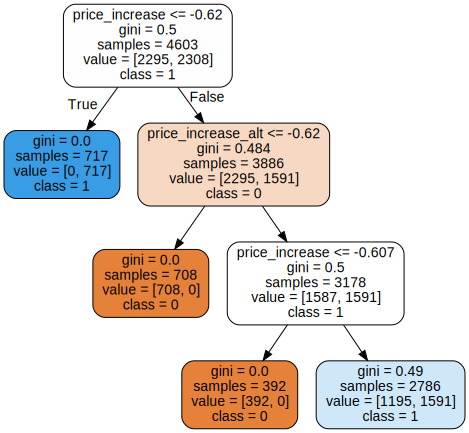

In [87]:
# Select data for modeling
X = df_clean[['annual_trip_freq', 'legroom',	'legroom_alt',	'price_total',	'price_total_alt',	
              'price_increase',	'price_increase_alt',	'scaled_distance', 'scaled_age',	'scaled_height']].values
y = df_clean['selection'].values

# Fit model and display results
X_train, X_test, y_train, y_test, clf, graph = fitting(X, y, 'gini', 'best', 
                                                       mdepth = 3, 
                                                       clweight = None,
                                                       minleaf = 50)

# Plot tree graph
graph

# Save tree graph to a PDF
#graph.render('Decision_Tree_all_vars_gini')